In [6]:
import mne
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

path = r'Aanand_19_01.csv'
sfreq = 120
#ch_names = ['Fp2', 'F4', 'F8', 'T8', 'Fp1', 'F3', 'F7', 'T7', 'Cz',
#            'C4', 'P4', 'O2', 'Pz', 'C3', 'P3', 'O1','stim']
df = pd.read_csv(path)
df.head()

,timestamps,Fp1,Fp2,C3,C4,P7,P8,O1,O2,F7,F8,F3,F4,T7,T8,P3,P4,stim,sfreq
0,1.709562e+09,-37315.566816,-37971.501109,-44301.649249,-39326.821485,-38091.932308,-42685.081683,-39995.362162,-45340.603035,-46383.580134,-44207.906033,-45612.847282,-82818.845847,-47694.107615,-55704.123462,-46313.172139,-56584.022234,0.0,125
1,1.709562e+09,-74676.597080,-75963.789340,-88632.936911,-78996.697545,-76203.310633,-85438.559704,-80021.703842,-90723.853198,-94142.060774,-87977.807281,-89926.566473,-114472.134646,-94306.346095,-180493.242203,-93103.375209,-106202.749157,0.0,125
2,1.709562e+09,-70195.832276,-71380.295918,-84370.906278,-75097.167503,-71921.431651,-81097.135675,-75507.679642,-86529.682461,-93178.342960,-84785.575841,-86176.167271,-113766.713591,-90730.156389,-180578.938792,-89466.031130,-104809.877850,0.0,125
3,1.709562e+09,-75372.898623,-76687.985860,-89306.842006,-79372.072741,-76887.944566,-86097.712648,-80749.387234,-91372.679636,-93151.386756,-85667.352160,-87404.350925,-113962.917204,-91830.532769,-180690.921031,-90602.080894,-105176.401755,0.0,125
4,1.709562e+09,-71427.502802,-72627.389148,-85527.877274,-76314.622320,-73081.621299,-82298.899567,-76746.994465,-87678.472719,-94171.565076,-87515.394391,-89263.390215,-114363.102837,-93716.796484,-180443.084889,-92489.417492,-106010.837079,0.0,125


In [7]:
temp = df.drop('stim', axis=1)

In [8]:
df = temp.drop('sfreq', axis=1)

In [9]:
df.head()

,timestamps,Fp1,Fp2,C3,C4,P7,P8,O1,O2,F7,F8,F3,F4,T7,T8,P3,P4
0,1.709562e+09,-37315.566816,-37971.501109,-44301.649249,-39326.821485,-38091.932308,-42685.081683,-39995.362162,-45340.603035,-46383.580134,-44207.906033,-45612.847282,-82818.845847,-47694.107615,-55704.123462,-46313.172139,-56584.022234
1,1.709562e+09,-74676.597080,-75963.789340,-88632.936911,-78996.697545,-76203.310633,-85438.559704,-80021.703842,-90723.853198,-94142.060774,-87977.807281,-89926.566473,-114472.134646,-94306.346095,-180493.242203,-93103.375209,-106202.749157
2,1.709562e+09,-70195.832276,-71380.295918,-84370.906278,-75097.167503,-71921.431651,-81097.135675,-75507.679642,-86529.682461,-93178.342960,-84785.575841,-86176.167271,-113766.713591,-90730.156389,-180578.938792,-89466.031130,-104809.877850
3,1.709562e+09,-75372.898623,-76687.985860,-89306.842006,-79372.072741,-76887.944566,-86097.712648,-80749.387234,-91372.679636,-93151.386756,-85667.352160,-87404.350925,-113962.917204,-91830.532769,-180690.921031,-90602.080894,-105176.401755
4,1.709562e+09,-71427.502802,-72627.389148,-85527.877274,-76314.622320,-73081.621299,-82298.899567,-76746.994465,-87678.472719,-94171.565076,-87515.394391,-89263.390215,-114363.102837,-93716.796484,-180443.084889,-92489.417492,-106010.837079


In [10]:
eeg_data = df.iloc[:,1:18].values.T
eeg_data[:-1] = eeg_data[:-1] * (10*(-6))
eeg_data[:-1] = eeg_data[:-1] / 4

ch_names = ['Fp1',	'Fp2'	,'C3'	,'C4'	,'P7'	,'P8'	,'O1'	,'O2'	,'F7'	,'F8'	,'F3'	,'F4'	,'T7'	,'T8'	,'P3'	,'P4']
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = ( ["eeg" ]*16))
raw = mne.io.RawArray(eeg_data, info)
raw.set_eeg_reference()

raw.filter(l_freq = 1,h_freq = 30)

Creating RawArray with float64 data, n_channels=16, n_times=65257
    Range : 0 ... 65256 =      0.000 ...   543.800 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 397 samples (3.308 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,120.00 Hz
Highpass,1.00 Hz
Lowpass,30.00 Hz


In [11]:
# import mne
# from mne.channels import DigMontage

# # Define electrode positions
# positions = {
#     'Fp1': (-0.3268, 0.6235, 0.0351),  # Replace x_fp1, y_fp1, z_fp1 with actual coordinates
#     'Fp2': (0.3268, 0.6235, 0.0351),  # Replace x_fp2, y_fp2, z_fp2 with actual coordinates
#     'F7': (-0.873, 0.431, 0.032),  # Replace x_f7, y_f7, z_f7 with actual coordinates
#     'F3': (-0.514, 0.474, 0.034),  # Replace x_f3, y_f3, z_f3 with actual coordinates
#     'Fz': (0, 0.55, 0.035),  # Replace x_fz, y_fz, z_fz with actual coordinates
#     'F4': (0.514, 0.474, 0.034),  # Replace x_f4, y_f4, z_f4 with actual coordinates
#     'F8': (0.873, 0.431, 0.032),  # Replace x_f8, y_f8, z_f8 with actual coordinates
#     'T7': (-0.973, -0.041, 0.031),  # Replace x_t7, y_t7, z_t7 with actual coordinates
#     'C3': (-0.327, -0.103, 0.031),  # Replace x_c3, y_c3, z_c3 with actual coordinates
#     'Cz': (0, 0, 0.034),  # Replace x_cz, y_cz, z_cz with actual coordinates
#     'C4': (0.327, -0.103, 0.031),  # Replace x_c4, y_c4, z_c4 with actual coordinates
#     'T8': (0.973, -0.041, 0.031),  # Replace x_t8, y_t8, z_t8 with actual coordinates
#     'P7': (-0.7, -0.685, 0.032),  # Replace x_p7, y_p7, z_p7 with actual coordinates
#     'P3': (-0.273, -0.796, 0.034),  # Replace x_p3, y_p3, z_p3 with actual coordinates
#     'Pz': (0, -0.847, 0.034),  # Replace x_pz, y_pz, z_pz with actual coordinates
#     'P4': (0.273, -0.796, 0.034),  # Replace x_p4, y_p4, z_p4 with actual coordinates
#     # Add coordinates for other electrodes
# }

# # Create a DigMontage object
# montage = DigMontage(pos=positions)

# # Set the montage for the info object
# info.set_montage(montage)


Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components
Fitting ICA took 2.7s.
Creating RawArray with float64 data, n_channels=16, n_times=65257
    Range : 0 ... 65256 =      0.000 ...   543.800 secs
Ready.


C:\Users\LEGION\AppData\Local\Temp\ipykernel_11104\908155094.py:8: RuntimeWarning: Using n_components=16 (resulting in n_components_=16) may lead to an unstable mixing matrix estimation because the ratio between the largest (10) and smallest (1.5e-27) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 15
  ica.fit(raw)


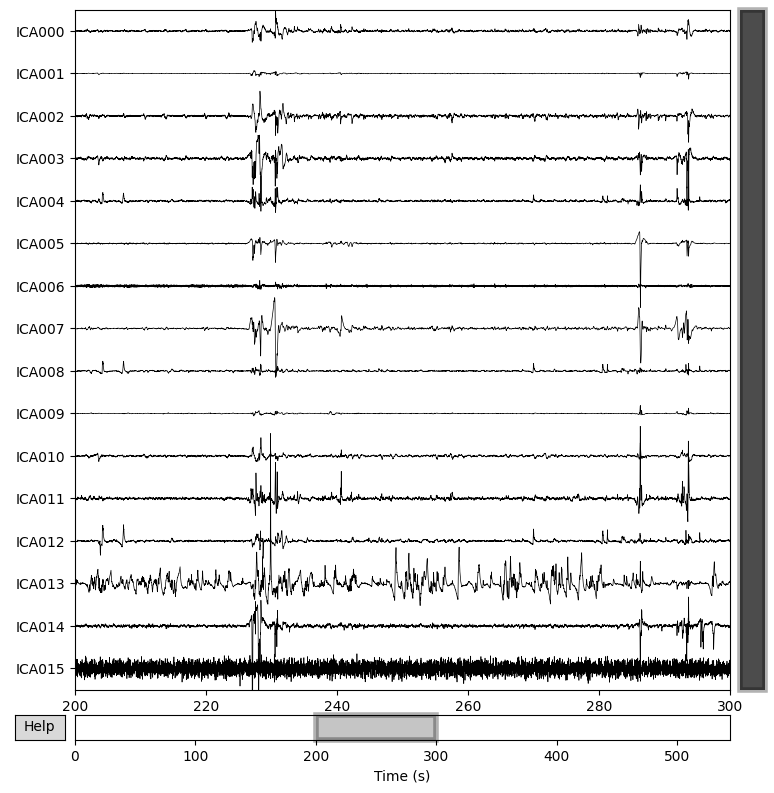

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 0 ICA components
    Projecting back using 16 PCA components


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA


# Create and fit ICA
ica = ICA(n_components=16, random_state=97)
ica.fit(raw)

# Get the spatial maps of the independent components
spatial_maps = ica.get_components()

# Plot the independent component sources
mne.viz.plot_ica_sources(ica, raw, picks=None, start=200, stop=300, title=None, show=True, block=False, show_first_samp=True, show_scrollbars=True, time_format='float', precompute=None, use_opengl=None, theme=None, overview_mode=None, splash=True)

raw_ica = ica.apply(raw)
### No digitization points found>>

In [13]:
duration = 0.3

epochs=mne.make_fixed_length_epochs(raw_ica, duration = duration, overlap=0,preload=True)

Not setting metadata
1812 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1812 events and 36 original time points ...


0 bad epochs dropped


In [14]:
epochs.drop_bad()  # This will drop bad epochs
num_epochs = len(epochs)
print("Total number of epochs created:", num_epochs)


Total number of epochs created: 1812


In [15]:
epochs.get_data()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11104\1251544707.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data()


array([[[ 1.33624167e-04, -9.47498088e+04, -1.18741521e+05, ...,
         -5.23670202e+04, -5.06966888e+04, -4.86352831e+04],
        [-8.27909080e-04, -8.71308303e+04, -1.09061071e+05, ...,
         -4.82060800e+04, -4.65276719e+04, -4.44931264e+04],
        [-7.90493442e-04, -4.17954277e+03, -3.32603132e+03, ...,
         -1.43460438e+03, -1.17056286e+03, -5.91145585e+02],
        ...,
        [ 4.76892550e-03,  1.05012041e+06,  1.34086027e+06, ...,
          5.92506530e+05,  5.75425190e+05,  5.58254072e+05],
        [-1.31038807e-03,  2.93725832e+04,  3.14973297e+04, ...,
          1.30002301e+04,  1.23950503e+04,  1.13286846e+04],
        [ 1.07119394e-02, -5.94410355e+05, -7.53691864e+05, ...,
         -3.30326240e+05, -3.20963820e+05, -3.11965225e+05]],

       [[-4.69823830e+04, -4.59934267e+04, -4.49759953e+04, ...,
         -1.17465137e+04, -1.05093452e+04, -9.50710780e+03],
        [-4.30298837e+04, -4.22719128e+04, -4.13617966e+04, ...,
         -1.07290736e+04, -9.49570870e

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 36, using nperseg = 36
  warnings.warn('nperseg = {0:d} is greater than input length '


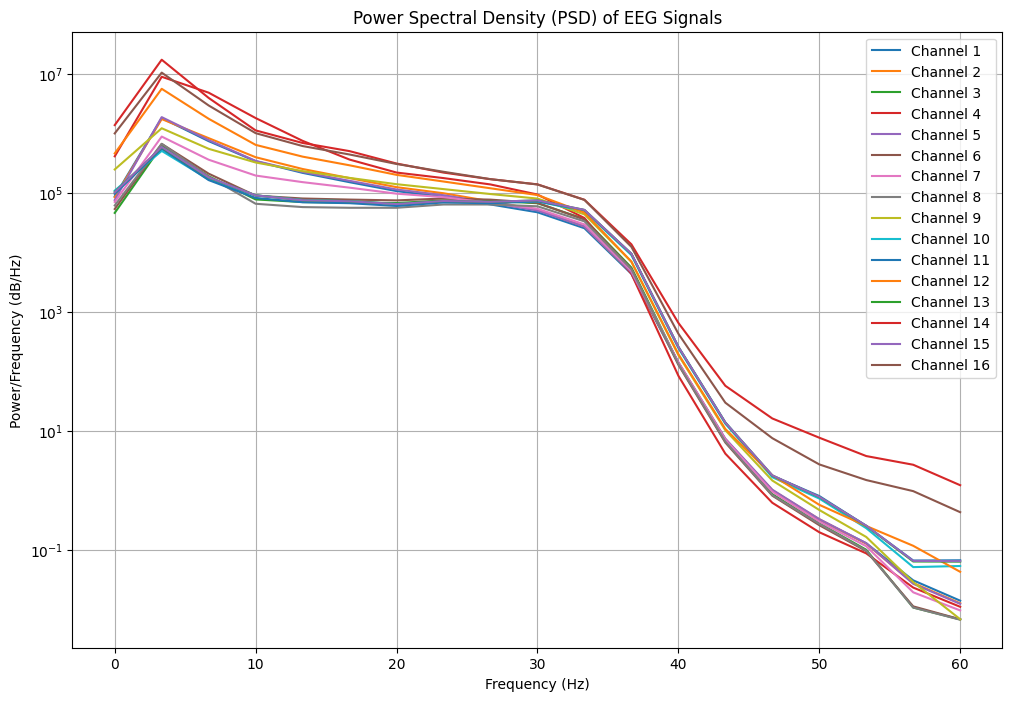

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

data = epochs.get_data(copy=True)
sfreq = epochs.info['sfreq']
n_epochs, n_channels, n_time_points = data.shape

plt.figure(figsize=(12, 8))

for channel_idx in range(n_channels):
    # Calculate PSD for the current channel
    freqs, psd = welch(data[:, channel_idx, :], fs=sfreq, axis=-1)
    
    # Average PSD across epochs
    avg_psd = np.mean(psd, axis=0)
    
    # Plot the PSD
    plt.semilogy(freqs, avg_psd, label=f'Channel {channel_idx + 1}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD) of EEG Signals')
plt.legend()
plt.grid(True)
plt.show()


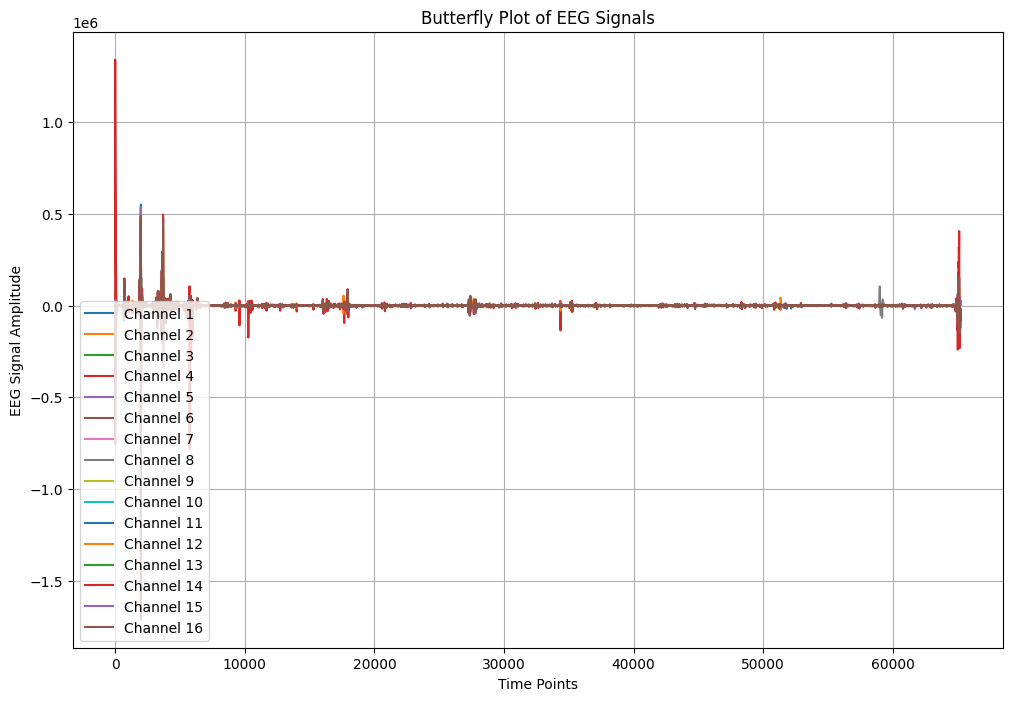

In [17]:
data = epochs.get_data(copy=True) 
n_epochs, n_channels, n_time_points = data.shape
plt.figure(figsize=(12, 8))

for channel_idx in range(n_channels):
    channel_data = data[:, channel_idx, :].flatten()
    time_points = np.arange(n_time_points * n_epochs)
    plt.plot(time_points, channel_data, label=f'Channel {channel_idx + 1}')


plt.xlabel('Time Points')
plt.ylabel('EEG Signal Amplitude')
plt.title('Butterfly Plot of EEG Signals')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import mne

eeg_data = epochs.get_data()

condition_ranges = {'lev1': (100/duration, 200/duration),
                    'lev2': (280/duration, 380/duration),
                    'lev3': (420/duration, 520/duration)}

epochs_by_condition = {}
selected_epochs = []

for condition, (start_epoch, end_epoch) in condition_ranges.items():
    start_epoch = int(start_epoch)
    end_epoch = int(end_epoch)
    condition_epochs = epochs[start_epoch:end_epoch+1].copy()
    epochs_by_condition[condition] = condition_epochs
    selected_epochs.append(condition_epochs)

selected_epochs = mne.concatenate_epochs(selected_epochs)

for condition, epoch_data in epochs_by_condition.items():
    num_epochs = len(epoch_data)
    print(f"Number of epochs for {condition}: {num_epochs}")

print(f"Total number of selected epochs: {len(selected_epochs)}")


Not setting metadata
1002 matching events found
No baseline correction applied
Number of epochs for lev1: 334
Number of epochs for lev2: 334
Number of epochs for lev3: 334
Total number of selected epochs: 1002


C:\Users\LEGION\AppData\Local\Temp\ipykernel_11104\776002152.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()


In [19]:

condition_of_interest = 'lev1'
epoch_array_for_condition = epochs_by_condition[condition_of_interest]
print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


Epoch array shape for condition lev1: (334, 16, 36)


C:\Users\LEGION\AppData\Local\Temp\ipykernel_11104\1489624503.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


In [20]:
condition_of_interest = 'lev1'
epoch_array_for_condition = epochs_by_condition[condition_of_interest]

In [21]:
import pandas as pd
import numpy as np
from scipy.signal import welch



def calculate_psd_features(epoch_data, sfreq):
    psd_frequencies, psd_values = welch(epoch_data, fs=sfreq)
    psd_means = np.mean(psd_values, axis=1)  # Calculate mean PSD values for each channel
    psd_variances = np.var(psd_values, axis=1)  # Calculate variance of PSD values for each channel
    psd_std_devs = np.std(psd_values, axis=1)  # Calculate standard deviation of PSD values for each channel

    # Define the frequency range of interest (e.g., alpha band: 8-12 Hz)
    freq_min = 14
    freq_max = 30

    # Find the indices corresponding to the frequency range of interest
    idx_min = np.argmax(psd_frequencies > freq_min) - 1
    idx_max = np.argmax(psd_frequencies > freq_max)

    # Extract the PSD within the specified frequency range
    psd_values_alpha_band = psd_values[:, idx_min:idx_max]
    psd_means_alpha_band = np.mean(psd_values_alpha_band, axis=1)  # Calculate mean PSD values in alpha band for each channel
    psd_variances_alpha_band = np.var(psd_values_alpha_band, axis=1)  # Calculate variance of PSD values in alpha band for each channel
    psd_std_devs_alpha_band = np.std(psd_values_alpha_band, axis=1)  # Calculate standard deviation of PSD values in alpha band for each channel
    return psd_means_alpha_band, psd_variances_alpha_band, psd_std_devs_alpha_band

channel_names = epochs.ch_names
sfreq = epochs.info['sfreq']  # Sampling frequency

columns = [f'{feature}_{channel}' for feature in ['mean_psd', 'variance_psd', 'standarddev_psd'] for channel in channel_names]
columns.append('condition')
feature_df = pd.DataFrame(columns=columns)

def append_epoch_data(epoch_array, condition_label):
    global feature_df
    for epoch in epoch_array:
        psd_means, psd_variances, psd_std_devs = calculate_psd_features(epoch, sfreq)
        epoch_features = np.concatenate([psd_means, psd_variances, psd_std_devs])
        epoch_features = np.append(epoch_features, condition_label)
        epoch_df = pd.DataFrame([epoch_features], columns=columns)
        feature_df = pd.concat([feature_df, epoch_df], ignore_index=True)

append_epoch_data(epochs_by_condition['lev1'], 'lev1')
append_epoch_data(epochs_by_condition['lev2'], 'lev2')
append_epoch_data(epochs_by_condition['lev3'], 'lev3')

print("Shape of feature DataFrame:", feature_df.shape)
print(feature_df.head())


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 36, using nperseg = 36
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of feature DataFrame: (1002, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  1081.0766752651955  1237.0483389411493   996.3791299095069   
1   535.1345322196078   766.0719044683974    676.225937867497   
2   943.4071209289077  1104.2897499639212    846.191002022896   
3  1131.2625236139565  1699.0543668964463  1370.1302341592454   
4  1283.3845476465692   1141.063104014571  1087.3706658177207   

          mean_psd_C4         mean_psd_P7        mean_psd_P8  \
0  272.44530399423905   1334.579099275531  956.5408162235716   
1   814.8350251137064   778.8846058816554  635.0479376620582   
2   264.9449428574352   998.8493838797468  964.3243268898764   
3   575.0565554322735  1405.2444930509373  1315.645293860416   
4  435.76216416287895  1481.7724342203585   934.068892190406   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  1372.1318372852147  1044.3296622280627   668.1508903031416   
1   666.2647955676913   549.4883873930613    738.435930

In [22]:
# Rename columns using a dictionary
new_column_names = {
    'mean_psd_Fp1': 'mean_psd_Fp1',
    'mean_psd_Fp2': 'mean_psd_Fp2',
    'mean_psd_C3': 'mean_psd_C3',
    'mean_psd_C4': 'mean_psd_C4',
    'mean_psd_P7': 'mean_psd_P7',
    'mean_psd_P8': 'mean_psd_P8',
    'mean_psd_O1': 'mean_psd_O1',
    'mean_psd_O2': 'mean_psd_O2',
    'mean_psd_F7': 'mean_psd_F7',
    'mean_psd_F8': 'mean_psd_F8',
    'standarddev_psd_Fp1': 'stddev_psd_Fp1',
    'standarddev_psd_Fp2': 'stddev_psd_Fp2',
    'standarddev_psd_C3': 'stddev_psd_C3',
    'standarddev_psd_C4': 'stddev_psd_C4',
    'standarddev_psd_P7': 'stddev_psd_P7',
    'standarddev_psd_P8': 'stddev_psd_P8',
    'standarddev_psd_O1': 'stddev_psd_O1',
    'standarddev_psd_O2': 'stddev_psd_O2',
    'standarddev_psd_F7': 'stddev_psd_F7',
    'standarddev_psd_F8': 'stddev_psd_F8'
}

# Rename columns using the rename() method
feature_df.rename(columns=new_column_names, inplace=True)

# Print the DataFrame
print(feature_df.head())


         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  1081.0766752651955  1237.0483389411493   996.3791299095069   
1   535.1345322196078   766.0719044683974    676.225937867497   
2   943.4071209289077  1104.2897499639212    846.191002022896   
3  1131.2625236139565  1699.0543668964463  1370.1302341592454   
4  1283.3845476465692   1141.063104014571  1087.3706658177207   

          mean_psd_C4         mean_psd_P7        mean_psd_P8  \
0  272.44530399423905   1334.579099275531  956.5408162235716   
1   814.8350251137064   778.8846058816554  635.0479376620582   
2   264.9449428574352   998.8493838797468  964.3243268898764   
3   575.0565554322735  1405.2444930509373  1315.645293860416   
4  435.76216416287895  1481.7724342203585   934.068892190406   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  1372.1318372852147  1044.3296622280627   668.1508903031416   
1   666.2647955676913   549.4883873930613    738.435930035792   
2  1269.9185344217797   1093.

In [23]:
feature_df

,mean_psd_Fp1,mean_psd_Fp2,mean_psd_C3,mean_psd_C4,mean_psd_P7,mean_psd_P8,mean_psd_O1,mean_psd_O2,mean_psd_F7,mean_psd_F8,...,stddev_psd_O2,stddev_psd_F7,stddev_psd_F8,standarddev_psd_F3,standarddev_psd_F4,standarddev_psd_T7,standarddev_psd_T8,standarddev_psd_P3,standarddev_psd_P4,condition
0,1081.0766752651955,1237.0483389411493,996.3791299095069,272.44530399423905,1334.579099275531,956.5408162235716,1372.1318372852147,1044.3296622280627,668.1508903031416,2037.5340970553914,...,1238.704790464705,664.6123977155642,2487.919782535876,2326.003502101575,1189.7592594768694,2392.287547580958,1040.3551189864227,2682.089199504997,338.2738962425451,lev1
1,535.1345322196078,766.0719044683974,676.225937867497,814.8350251137064,778.8846058816554,635.0479376620582,666.2647955676913,549.4883873930613,738.435930035792,1498.8322742572357,...,670.4308540560411,597.4482222213651,2121.5915131688284,2297.615255656183,370.56290732775784,2343.479970012775,2151.1771963278443,2373.1886759136337,402.55244885507625,lev1
2,943.4071209289077,1104.2897499639212,846.191002022896,264.9449428574352,998.8493838797468,964.3243268898764,1269.9185344217797,1093.981298878107,622.7279501350969,2085.5738965827777,...,1426.460199955506,700.0026327137504,2879.4475235239347,3066.2016245960053,326.5889572813363,3007.1334787536252,126.04678348862492,2947.5031785060232,284.6560552651185,lev1
3,1131.2625236139565,1699.0543668964463,1370.1302341592454,575.0565554322735,1405.2444930509373,1315.645293860416,12474.042519645462,1207.518628721665,1293.8610946798046,2641.185663188627,...,1601.127406402083,1202.007512178876,2891.755598618017,3092.480631693555,535.5480231067615,3075.6756857590926,1304.8723939040813,2864.0287571707677,1690.3330402339018,lev1
4,1283.3845476465692,1141.063104014571,1087.3706658177207,435.76216416287895,1481.7724342203585,934.068892190406,1379.3908806246725,910.6619248506519,642.0400164442891,2821.5064662371715,...,1352.5076757886632,648.5330343211538,3708.6426401279286,4157.528530885646,270.8773251466941,4031.229899689251,478.2048806114073,3737.8273551125008,516.967045426906,lev1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,594.5063916457315,747.7751304435319,540.6128107836507,81.1356015100946,610.6003323027927,426.10980217811357,564.7833514754454,486.4919595862942,795.3628514240513,654.5109942834962,...,483.72647739965254,599.1093235151224,648.3398007597192,915.0597054198148,680.176197960616,835.6298078596998,1232.4035630701433,1029.7525558031894,691.3804695031422,lev3
998,349.06933770423194,298.65747941300083,194.76608664615694,68.36971081399808,191.35419650156962,268.1457471245513,186.76403838293666,193.11871669170205,751.4660725625814,537.8839195210552,...,229.5104358766444,1229.1631014239238,648.9449262853365,959.6781719316799,137.01501243314956,1020.2910584260625,759.8945057934586,1117.6767124540186,220.35825388047124,lev3
999,781.6580511759943,958.6811024127701,810.1357666578388,85.9366290593348,711.4998943457359,857.2380004137134,947.4850859641734,977.3420724905623,2817.096136065395,1260.2545870490414,...,897.7526459187981,3170.9070240348983,1505.034984016471,1617.6518554237282,642.2549579895552,1518.6194653109635,2559.62279767145,1553.0265485334633,1474.3214328130302,lev3
1000,615.125703486313,467.1163224344762,569.3356519493782,39.98981875928411,578.7587355465749,424.77565437278923,500.6406656709208,590.2785344222688,624.3561968672551,602.8520699158204,...,708.5642860349839,381.4423991044206,831.3776306725689,585.2558015262355,475.65856352479676,638.711042562245,435.41574682205885,633.9741737161335,455.60963366409544,lev3


In [24]:
# import matplotlib.pyplot as plt

# def plot_psd_features(psd_features, freqs, ch_names):
#     num_channels = len(ch_names)
    
#     fig, axs = plt.subplots(num_channels, figsize=(10, 6*num_channels))
#     for i, (channel_psd, channel_name) in enumerate(zip(psd_features, ch_names)):
#         axs[i].plot(freqs, channel_psd, label=channel_name)
#         axs[i].set_title(f'Power Spectral Density (PSD) for Channel {channel_name}')
#         axs[i].set_xlabel('Frequency (Hz)')
#         axs[i].set_ylabel('PSD')
#         axs[i].grid(True)
#         axs[i].legend()

#     plt.tight_layout()
#     plt.show()

# psd_frequencies, psd_values = welch(epoch_data[0], fs=sfreq)

# # Example usage:
# plot_psd_features(psd_values,  psd_frequencies, ch_names


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = feature_df.drop(columns=['condition'])
y = feature_df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6417910447761194


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier on the training data
log_reg_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = log_reg_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.3582089552238806


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = feature_df.drop(columns=['condition'])
y = feature_df['condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6766169154228856
